In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
 
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile


In [3]:
bikes_hour_df_raw = pd.read_csv('hour.csv')
bikes_day_df_raw = pd.read_csv('/tmp/Bike-Sharing-Dataset/day.csv')

#usando tmp da normalizados
bikes_hour_df_raw['cnt'].describe()


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [4]:
bikes_hour_df_raw.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0.5,0.98,'Recorded Bike Rentals Counts')

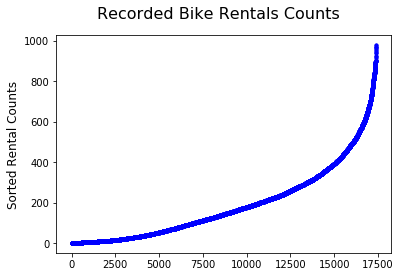

In [7]:

bikes_hour_df = bikes_hour_df_raw.drop(['casual', 'registered'], axis=1) 

fig,ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color='blue', marker='.')
ax.set_ylabel("Sorted Rental Counts", fontsize=12)
fig.suptitle('Recorded Bike Rentals Counts', fontsize=16)


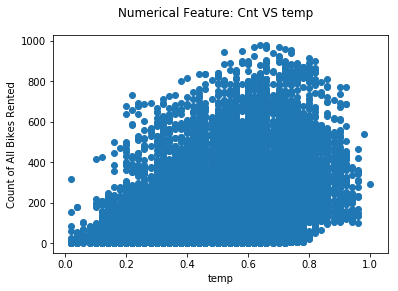

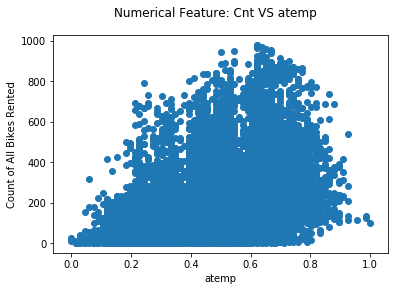

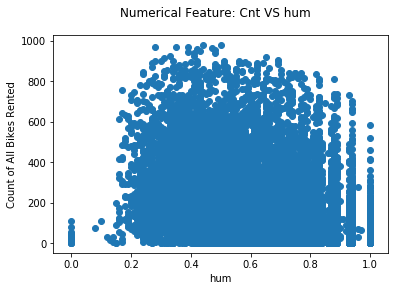

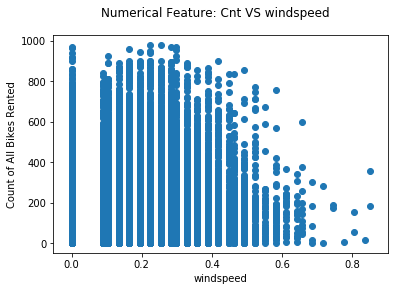

In [6]:
counter_ = 0
for tp in bikes_hour_df.dtypes:
    if (tp == "float64"):
        bikes_hour_df = bikes_hour_df.sort_values(bikes_hour_df.dtypes.index[counter_])
        feature = bikes_hour_df.dtypes.index[counter_]
        plt.scatter(bikes_hour_df[feature], bikes_hour_df['cnt'])
        plt.suptitle("Numerical Feature: Cnt VS " + feature)
        plt.xlabel(feature)
        plt.ylabel("Count of All Bikes Rented")
        plt.show()
    counter_ += 1

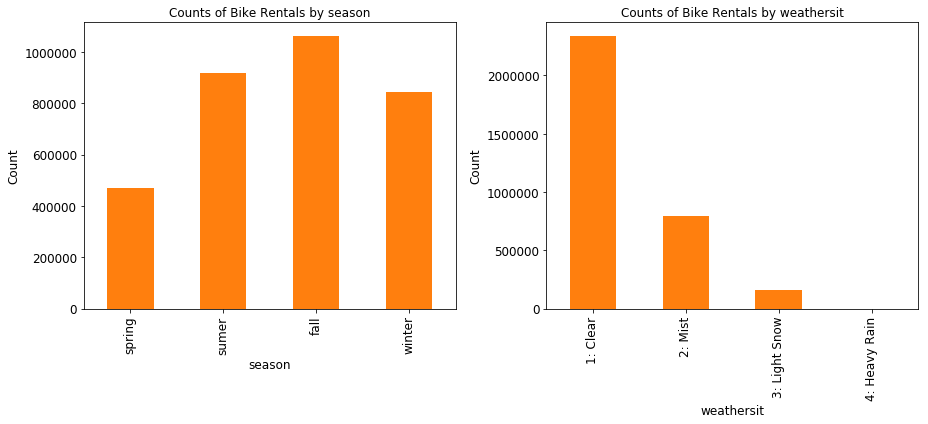

In [8]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
            legend = False, title ="Counts of Bike Rentals by season", stacked=True, fontsize=12, ax=ax1)

ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])
 
ax2 = bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

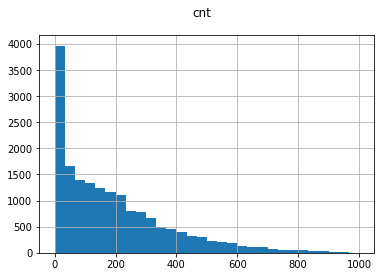

In [11]:
bikes_hour_df['cnt'].hist(bins=30, range=(0,1000)).plot()
plt.suptitle('cnt')
plt.show()

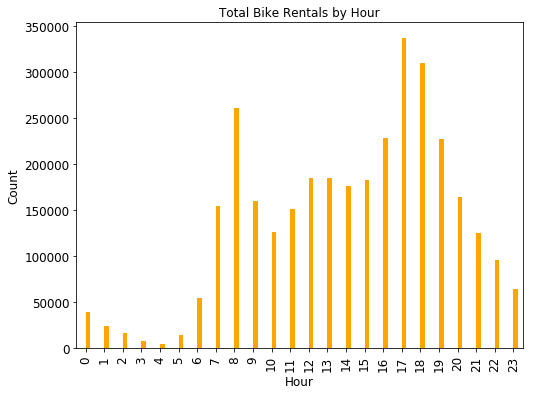

In [12]:
ax = bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
         legend = False, title ="Total Bike Rentals by Hour", color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

una vez analizados los datos procedemos a entrenar los modelos, para tratar de obtener una buena precision usaremos GMB

In [14]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()

outcome = 'cnt'
# create a feature list for each modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
               bike_df_model_ready[['cnt']],test_size=0.3, random_state=42)

from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 139.14


In [18]:
bike_df_model_ready = bikes_hour_df.copy()

outcome = 'cnt'
# create a feature list for eash modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 2 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, predictions)))


Root Mean squared error with PolynomialFeatures set to 2 degrees: 120.44


In [25]:
bike_df_model_ready = bikes_hour_df.copy()

outcome = 'cnt'
# create a feature list for eash modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
 
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 3 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error with PolynomialFeatures set to 3 degrees: 108.93


In [26]:
# make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()

outcome = 'cnt'
# create a feature list for eash modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
 
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 4 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error with PolynomialFeatures set to 4 degrees: 898259.34


In [27]:
def prepare_data_for_model(raw_dataframe, 
                           target_columns, 
                           drop_first = False, 
                           make_na_col = True):
    
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                            target_columns = ['season', 
                                                              'weekday', 
                                                              'weathersit'],
                                            drop_first = True)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant',  'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# print coefficients as this is what our web application will use in the end
print('Coefficients: \n', model_lr.coef_)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
 

Coefficients: 
 [[  8.15248087e+01  -3.05053709e-01   7.31700288e+00  -2.12212108e+01
    1.25047676e+01   2.56576596e+02   1.06754237e+02  -2.00225607e+02
    3.93454538e+01   2.54085994e+01   2.24746614e+00   7.16672281e+01
   -1.13686838e-13  -4.49090388e+00   6.22106355e-01  -2.38810162e+00
   -3.93756806e+00   1.47802402e+00   1.23008686e+01   1.42108547e-14
    9.33424984e+00  -2.40957826e+01   3.07030469e+01   0.00000000e+00]]
Root Mean squared error: 139.40


In [28]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                             target_columns = ['season', 'weekday', 'weathersit'])
list(bike_df_model_ready.head(1).values)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
 
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
 

Root Mean squared error: 68.15


In [30]:
# prior hours
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])

# shift the count of the last two hours forward so the new count can take in consideratio how the last two hours went 
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)

bike_df_model_ready =  pd.merge(bikes_hour_df, bikes_hour_df_shift[['dteday', 'hr', 'sum_hr_shift_1', 'sum_hr_shift_2']], how='inner', on = ['dteday', 'hr'])

# drop NAs caused by our shifting fields around
bike_df_model_ready = bike_df_model_ready.dropna()
bikes_hour_df_shift.head()

,dteday,hr,cnt,sum_hr_shift_1,sum_hr_shift_2
0,2011-01-01,0,16,NaN,NaN
1,2011-01-01,1,40,16.0,NaN
2,2011-01-01,2,32,40.0,16.0
3,2011-01-01,3,13,32.0,40.0
4,2011-01-01,4,1,13.0,32.0


In [31]:
outcome = 'cnt'
# create a feature list for each modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday','casual', 'registered']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 41.98


In [32]:
np.mean(bikes_hour_df_shift['sum_hr_shift_1'])

189.47117044539073

In [33]:
# loop through each feature and calculate the R^2 score
features = ['hr', 'season', 'holiday', 'temp']
from sklearn import linear_model
from sklearn.metrics import r2_score

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
        bike_df_model_ready[['cnt']],test_size=0.3, random_state=42)
    
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))
    

R^2 for hr is 0.159431
R^2 for season is 0.025891
R^2 for holiday is -0.001242
R^2 for temp is 0.168313


In [34]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df[['hr', 'season', 'holiday', 'temp', 'cnt']].copy()

outcome = 'cnt'

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready,  drop_first = False, 
                                             make_na_col = False, target_columns = ['season'])

features = [feat for feat in bike_df_model_ready if feat not in ['cnt']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()

for feat in features:
    model_lr = linear_model.LinearRegression()
    # train the model on training set
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))
    


R^2 for hr is 0.160129
R^2 for holiday is -0.000566
R^2 for temp is 0.166963
R^2 for season_1 is 0.058428
R^2 for season_2 is 0.004411
R^2 for season_3 is 0.021628
R^2 for season_4 is -0.001285


In [35]:
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
print('\n')
print('Intercept: %f' % model_lr.intercept_)

# features with coefficients 
feature_coefficients  = pd.DataFrame({'coefficients':model_lr.coef_[0], 
                                    'features':X_train.columns.values})

feature_coefficients.sort_values('coefficients')

Root Mean squared error: 147.86


Intercept: -119.061877


,coefficients,features
5,-42.697445,season_3
1,-29.096613,holiday
4,-3.808865,season_2
3,3.523756,season_1
0,8.626766,hr
6,42.982554,season_4
2,425.523181,temp


Tomamos los coeficientes de la regresion y ahi los evaluamos

In [36]:
# set up constants for our coefficients 
INTERCEPT = -121.029547
COEF_HOLIDAY = -23.426176   # day is holiday or not
COEF_HOUR = 8.631624        # hour (0 to 23)
COEF_SEASON_1 = 3.861149    # 1:springer
COEF_SEASON_2 = -1.624812   # 2:summer
COEF_SEASON_3 = -41.245562  # 3:fall
COEF_SEASON_4 = 39.009224   # 4:winter
COEF_TEMP = 426.900259      # norm temp in Celsius -8 to +39

el promedio de las temperaturas de los datos, normalizado

In [37]:
np.mean(X_train['temp'])

0.49805836415947391

In [38]:
# mean values
MEAN_HOLIDAY = 0.0275   # day is holiday or not
MEAN_HOUR = 11.6        # hour (0 to 23)
MEAN_SEASON_1 = 1       # 1:spring
MEAN_SEASON_2 = 0       # 2:summer
MEAN_SEASON_3 = 0       # 3:fall
MEAN_SEASON_4 = 0       # 4:winter
MEAN_TEMP = 0.4967      # norm temp in Celsius -8 to +39


# try predicting something - 9AM with all other features held constant
rental_counts = INTERCEPT + (MEAN_HOLIDAY * COEF_HOLIDAY) \
    + (9 * COEF_HOUR) \
    + (MEAN_SEASON_1 * COEF_SEASON_1)  + (MEAN_SEASON_2 * COEF_SEASON_2) \
    + (MEAN_SEASON_3 * COEF_SEASON_3)  + (MEAN_SEASON_4 * COEF_SEASON_4) \
    + (MEAN_TEMP * COEF_TEMP)

print('Estimated bike rental count for selected parameters: %i' % int(rental_counts))    

Estimated bike rental count for selected parameters: 171
